# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href='#limitations'>Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset captures information about the medical appointment bookings in Brazil. A total of 100k records are provided in the dataset which contains details about the patient, neighbourhood, the time at which the appointment was scheduled, the date on which the appointment, several factors and finally whether the patient showed up for the appointment or not.

By analaysing this dataset, we hope to answer several questions as to why the patients do not turn up for their appointments. These may include

* How does the neighbourhood affect the no show percentage?
* Are older patients likely to honour their appointments more than the younger ones?
* Do patients with specific diseases show up for appointments more often?
* Does the number of days between the shceduled date and appointment date have a bearing on the no show?
* Do innovative services like a SMS reminder help in reducing no shows?

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### 1. General Properties
#### 1.1 Load the data
Load the csv file into a Dataframes using pandas

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data

appointments = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 1.2 Investigate Data Types & Rename Columns
Check the shape of the data and data types

In [3]:
# Shape of the dataset
print("Shape : {}\n".format(appointments.shape))

# Rename Columns - remove underscores and hyphens in columns names
appointments.rename(columns={'SMS_received': 'SMSReceived', 'No-show': 'NoShow'}, inplace=True)

# DataTypes 
print("DataTypes : \n{}\n".format(appointments.dtypes)) 

Shape : (110527, 14)

DataTypes : 
PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMSReceived         int64
NoShow             object
dtype: object



#### 1.3 Fix Date Types
From the analysis above, we notice that dates are showing up as objects

In [4]:
# Remove time from ScheduledDay and AppointmentDay as we do not care about the time
appointments['ScheduledDay'] = pd.to_datetime(appointments['ScheduledDay']).dt.date
appointments['AppointmentDay'] = pd.to_datetime(appointments['AppointmentDay']).dt.date

# DataTypes 
print("DataTypes : \n{}\n".format(appointments.dtypes)) 

DataTypes : 
PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMSReceived         int64
NoShow             object
dtype: object



#### 1.4 Check contents of columns
Here we check the unique values in each columns to understand more about the data

In [5]:
# We dont need to know the unique values for PatientId and AppointmentId as they appear to be some generated number
# print("PatientId :  {}".format(appointments.PatientId.unique()))
# print("AppointmentID :  {}".format(appointments.AppointmentID.unique()))

print("Gender :  {}".format(appointments.Gender.unique()))

# We remove ScheduledDay and Appointment day because there are many unique values and may not be useful
# print("ScheduledDay :  {}".format(appointments.ScheduledDay.unique()))
# print("AppointmentDay :  {}".format(appointments.AppointmentDay.unique()))

# Need to sort the age & Neighbourhood as they have many values and to make it more readable
print("Age :  {}".format(np.sort(appointments.Age.unique())))
print("Neighbourhood :  {}".format(np.sort(appointments.Neighbourhood.unique())))

print("Scholarship :  {}".format(appointments.Scholarship.unique()))
print("Hipertension :  {}".format(appointments.Hipertension.unique()))
print("Diabetes :  {}".format(appointments.Diabetes.unique()))
print("Alcoholism :  {}".format(appointments.Alcoholism.unique()))
print("Handcap :  {}".format(appointments.Handcap.unique()))
print("SMSReceived :  {}".format(appointments.SMSReceived.unique()))
print("NoShow :  {}".format(appointments.NoShow.unique()))

Gender :  ['F' 'M']
Age :  [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]
Neighbourhood :  ['AEROPORTO' 'ANDORINHAS' 'ANTÔNIO HONÓRIO' 'ARIOVALDO FAVALESSA'
 'BARRO VERMELHO' 'BELA VISTA' 'BENTO FERREIRA' 'BOA VISTA' 'BONFIM'
 'CARATOÍRA' 'CENTRO' 'COMDUSA' 'CONQUISTA' 'CONSOLAÇÃO' 'CRUZAMENTO'
 'DA PENHA' 'DE LOURDES' 'DO CABRAL' 'DO MOSCOSO' 'DO QUADRO'
 'ENSEADA DO SUÁ' 'ESTRELINHA' 'FONTE GRANDE' 'FORTE SÃO JOÃO' 'FRADINHOS'
 'GOIABEIRAS' 'GRANDE VITÓRIA' 'GURIGICA' 'HORTO' 'ILHA DAS CAIEIRAS'
 'ILHA DE SANTA MARIA' 'ILHA DO BOI' 'ILHA DO FRADE' 'ILHA DO PRÍNCIPE'
 'ILHAS OCEÂNICAS DE TRINDADE' 'INHANGUETÁ' 'ITAR

#### 1.5 Check column boundries
Here we check the max and min values in each columns to understand the boundaries of the data.

In [6]:
# We need to know bounteries of only ScheduledDay and Appointment day because there are many unique values.
print("ScheduledDay min {} and max {}".format(appointments.ScheduledDay.min(),appointments.ScheduledDay.max()))
print("AppointmentDay min {} and max {}".format(appointments.AppointmentDay.min(),appointments.AppointmentDay.max()))


ScheduledDay min 2015-11-10 and max 2016-06-08
AppointmentDay min 2016-04-29 and max 2016-06-08


There are some interesting things which come accross when looking at the unique values and boundaries

* Gender : Data contains (F, M) for (Female, Male). So it looks ok
* Age :  There are records with age -1 - looks like a data issue .So will have to remove data with -ve age.
* Neighbourhood : There are many records. Data is not very useful
* Scholarship, Hipertension, Diabetes, Alcoholism, SMSReceived : Data contains (0,1) which is good
* Handcap : Data contains (0,1,2,3,4) - In Data dictoney for this data source in Kaggle its mention Handcap = True or False. So will have to remove all the values other than (0,1)
* NoShow : Data contains (Yes, No) - should convert to (1,0) for better data handling
* ScheduledDay & AppointmentDay : Schedule day is spread accross 7 months, whereas appointment day is only for around a month.So it looks like data is extracted for appointments between 29th April and 8th June(40 days).

I'll attempt to correct this in the next section

### 2. Data Cleaning
Here we perform steps to clean the data. We go column by column

#### 2.1 Clean Age Data
Here we try to fix the Age Data.

In [7]:
# Find Count of ages -1
print("Count before removing -ve age: {}\n".format(appointments[appointments.Age == -1].shape))
appointments=appointments.drop(appointments[appointments.Age < 0].index)
print("Count after removing -ve age: : {}\n".format(appointments[appointments.Age == -1].shape))

print(appointments.shape)

Count before removing -ve age: (1, 14)

Count after removing -ve age: : (0, 14)

(110526, 14)


#### 2.2 Clean Scholarship, Hipertension, Diabetes, Alcoholism, SMSReceived Data
Here we try to convert all these columns into boolen.

In [8]:
#appointments['Scholarship'] = appointments['Scholarship'] == 1
#appointments['Hipertension'] = appointments['Hipertension'] == 1
#appointments['Diabetes'] = appointments['Diabetes'] == 1
#appointments['Alcoholism'] = appointments['Alcoholism'] == 1
#appointments['SMSReceived'] = appointments['SMSReceived'] == 1

print(appointments.dtypes)
print(appointments.shape)

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMSReceived         int64
NoShow             object
dtype: object
(110526, 14)


#### 2.3 Clean Handcap Data
Handicap data should be true or false according to the dataset description. 
But we have records with value as 0,1,2,3,4 - So, we will drop records with value > 1

In [9]:
# Remove rows with Handcap > 1
print("Count before removing handicap > 1: {}\n".format(appointments[appointments["Handcap"] > 1].shape))
appointments=appointments.drop(appointments[appointments.Handcap>1].index)
print("Count after removing handicap > 1: {}\n".format(appointments[appointments["Handcap"]> 1].shape))

print(appointments.dtypes)
print(appointments.shape)

Count before removing handicap > 1: (199, 14)

Count after removing handicap > 1: (0, 14)

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMSReceived         int64
NoShow             object
dtype: object
(110327, 14)


#### 2.4 Clean NoShow
Convert (Yes, No) into (1,0) for column NoShow

In [10]:
# Convert NoShow into a int
appointments['NoShow'] = appointments.NoShow.apply(lambda x: 1 if x=='Yes' else 0)

print(appointments.dtypes)
print(appointments.shape)

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMSReceived         int64
NoShow              int64
dtype: object
(110327, 14)


### 3 Add Derived Columns
Here we compute multiple derived columns like
* Delta between Scheduled Day and Appointment Day (in days)
* Add a flag for Single diseased and Multi diseased people
#### 3.1 Delta Days 

In [11]:
# Delta Days = AppointmentDay - ScheduledDay in days
appointments['DeltaDays'] = ((appointments['AppointmentDay'] - appointments['ScheduledDay'])/np.timedelta64('1','D')).astype(int)
print(appointments.dtypes)
appointments.shape

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMSReceived         int64
NoShow              int64
DeltaDays           int64
dtype: object


(110327, 15)

#### 3.2 Single Diseased & Multi Diseased Flags

In [12]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

appointments['SingleDiseased'] = (appointments['Hipertension'] + appointments['Diabetes'] +appointments['Alcoholism'] +appointments['Handcap'] ) ==1
appointments['MultiDiseased'] = (appointments['Hipertension'] + appointments['Diabetes'] +appointments['Alcoholism'] +appointments['Handcap'] ) > 1


print(appointments.head())

      PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F   2016-04-29     2016-04-29   62   
1  5.589978e+14        5642503      M   2016-04-29     2016-04-29   56   
2  4.262962e+12        5642549      F   2016-04-29     2016-04-29   62   
3  8.679512e+11        5642828      F   2016-04-29     2016-04-29    8   
4  8.841186e+12        5642494      F   2016-04-29     2016-04-29   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMSReceived  NoShow  DeltaDays  SingleDiseased  MultiDiseased  
0        0            0       0         

#### 3.3 Classify into AgeGroups

In [13]:
appointments["AgeGroup"] = (appointments['Age']/5).astype(int)
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow,DeltaDays,SingleDiseased,MultiDiseased,AgeGroup
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,True,False,12
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,False,False,11
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,False,False,12
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,False,False,1
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,False,True,11


### 4. Calculate Variables

#### 4.1 Mean of No-Show for full dataset

In [14]:
totalMean = appointments['NoShow'].mean()
print("totalMean : {}".format(totalMean))

totalMean : 0.2019269988307486


## Research Questions

### 1. How does the neighbourhood affect the 'No-Show' ?
Here we try to see if the No-Show is higher in certain neighbourhoods

Text(0,0.5,'Mean')

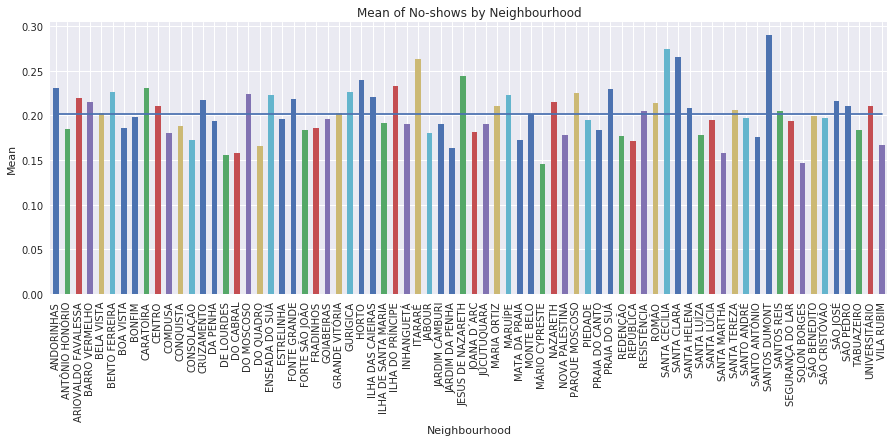

In [15]:
# Calculate the count of appointments per Neighbourhood
neighbourhoodCount = appointments.groupby(appointments.Neighbourhood).count()['PatientId']

# Calculate the mean of No-shows per neighbourhood
neighbourhoodMean = appointments.groupby(appointments.Neighbourhood).mean()['NoShow']

# Combine both series into a pandas datadrame
neighbourhooddf = pd.DataFrame({'cnt' : neighbourhoodCount,'mean' : neighbourhoodMean,"totMean" : totalMean})

# Drop all rows where count < 100 
neighbourhooddf = neighbourhooddf.drop(neighbourhooddf[neighbourhooddf.cnt < 100].index)

sns.set()
ax = neighbourhooddf['totMean'].plot.line()
ax1 = neighbourhooddf['mean'].plot.bar(figsize=(15,5), ax=ax,title ="Mean of No-shows by Neighbourhood")
ax1.set_ylabel("Mean")


We do not see any correlation between the neighbourhoods and the no show.

### 2. Are older patients likely to honour their appointments more than the younger ones?

Text(0,0.5,'Mean')

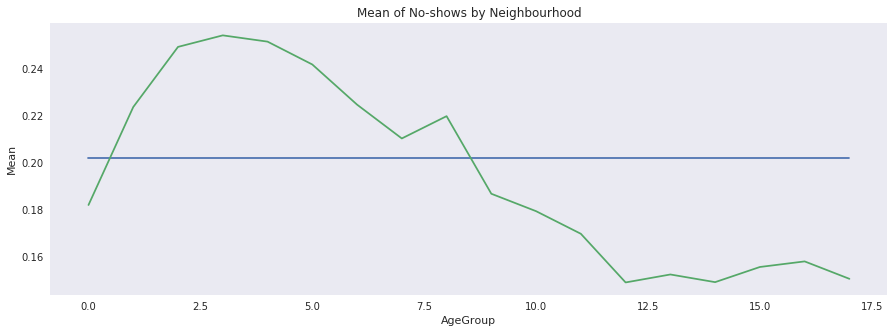

In [16]:
# Calculate the count of appointments for each Age
ageCount = appointments.groupby(appointments.AgeGroup).count()['PatientId']

# Calculate the mean of No-shows per Age
ageMean = appointments.groupby(appointments.AgeGroup).mean()['NoShow']

# Combine both series into a pandas datadrame
ageDf = pd.DataFrame({'cnt' : ageCount, 'mean' : ageMean, 'totMean' : totalMean})

# Drop all rows where count < 500 
ageDf = ageDf.drop(ageDf[ageDf.cnt < 500].index)

sns.set_style("dark")
ax = ageDf['totMean'].plot.line()
ax1 = ageDf['mean'].plot.line(figsize=(15,5), ax=ax,title ="Mean of No-shows by Neighbourhood")
ax1.set_ylabel("Mean")

We can definitely see a corelation between the Age and No-Show values. We see that people in the lowest age group (0-5 years) are likely to show up for appoitnments. However, after that till about the age of 40, the no-show rates are above the mean, After the age group 9 (45-50), though we see a sharp decline in the no shows. This means that the older people are more likely to honour the appointment.

### 3. Do patients with specific diseases show up for appointments more often?

Text(0,0.5,'Mean')

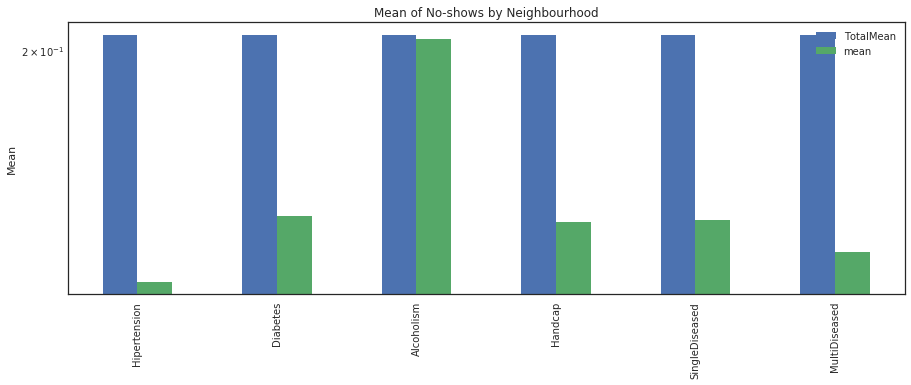

In [17]:
#SingleDiseased MultiDiseased 

# Calculate the mean of No-shows per Age
HipertensionMean = appointments[appointments.Hipertension == 1].mean()['NoShow']
DiabetesMean = appointments[appointments.Diabetes == 1].mean()['NoShow']
AlcoholismMean = appointments[appointments.Alcoholism == 1].mean()['NoShow']
HandcapMean = appointments[appointments.Handcap == 1].mean()['NoShow']
SingleDiseasedMean = appointments[appointments.SingleDiseased==True].mean()['NoShow']
MultiDiseasedMean = appointments[appointments.MultiDiseased==True].mean()['NoShow']

# Combine both series into a pandas datadrame
DDf = pd.DataFrame({'mean' : [HipertensionMean,DiabetesMean,AlcoholismMean,HandcapMean,SingleDiseasedMean,MultiDiseasedMean], 'TotalMean' : totalMean},index = ['Hipertension','Diabetes','Alcoholism','Handcap','SingleDiseased','MultiDiseased'])

sns.set_style("white")
ax1 = DDf.plot.bar(figsize=(15,5), title ="Mean of No-shows by Neighbourhood", logy=True)
ax1.set_ylabel("Mean")

We see all diseased people turn up more often for an appointment than the mean value. However, there is a big variation between the diseases. People with Hypertension are most likely to turn up for an appointment whereas alcoholics are least likely 

### 4. How does the Delta days affect 'No-Show'?

Text(0,0.5,'Mean')

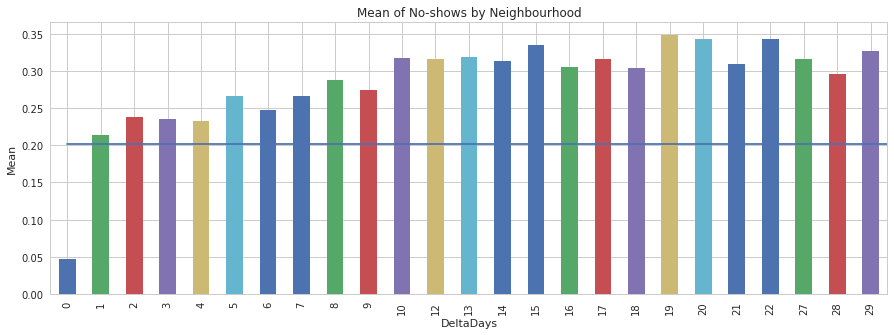

In [18]:
# Calculate the count of appointments for each Age
deltaCount = appointments.groupby(appointments.DeltaDays).count()['PatientId']

# Calculate the mean of No-shows per Age
deltaMean = appointments.groupby(appointments.DeltaDays).mean()['NoShow']

# Combine both series into a pandas datadrame
deltaDf = pd.DataFrame({'cnt' : deltaCount, 'mean' : deltaMean, 'totMean' : totalMean})

# Drop all rows where count < 500 
deltaDf = deltaDf.drop(deltaDf[deltaDf.cnt < 1000].index)

sns.set_style("whitegrid")
ax = deltaDf['totMean'].plot.line()
ax1 = deltaDf['mean'].plot.bar(figsize=(15,5), ax=ax,title ="Mean of No-shows by Neighbourhood")
ax1.set_ylabel("Mean")

We see that if a appointment is scheduled on the same day (that is the delta days = 0) then the no-show is significantly lower than the mean.

### 5. Do innovative services like a SMS reminder help in reducing 'No-Shows'?

Text(0,0.5,'Mean')

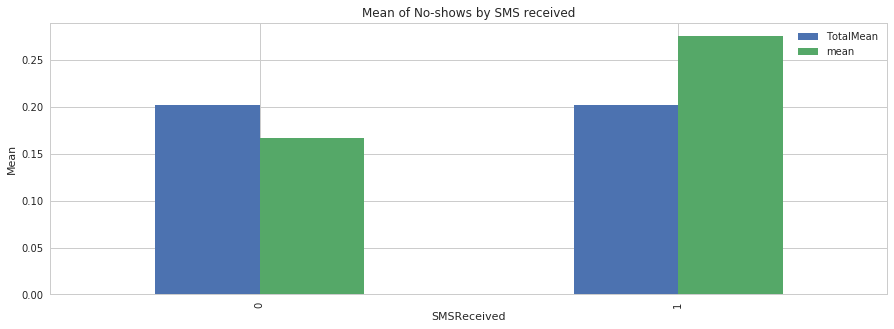

In [19]:
# Calculate the mean of No-shows per Age
SMSMean = appointments.groupby(appointments.SMSReceived).mean()['NoShow']

# Combine both series into a pandas datadrame
SMSDf = pd.DataFrame({'mean' : SMSMean, 'TotalMean' : totalMean})


ax1 = SMSDf.plot.bar(figsize=(15,5), title ="Mean of No-shows by SMS received")
ax1.set_ylabel("Mean")

We see that SMS actually has a negative impact on the No-show. People who receive SMS are more likely to not turn up for the appointment.

<a id='limitations'></a>
## Limitations
We have noted the following limitations with the data that we analysed
* We see that the appointment day range is only for about 40 days - which means that the data is for a very short period and the conclusions that we draw from this might vary if we have a larger dataset comprising of longer durations
* It would have been good if the **reason** for scheduling the appointment was known. For example, the patient could have scheduled an appointment for consulting a doctor for fever (which would last only a few days), but may have got an appointment say, after 1 month. In such cases, a no-show is liekly as he might have got cured by then.
* It is not known how the data for SMS received was obtained. Whether its the delivery notification from the telecom provider or just the fact that a SMS was sent or an actual confirmation from the patient that the SMS was received. So it very difficult to draw conclusions from that data point

<a id='conclusions'></a>
## Conclusions

We can draw the following conclusions from the data analysis 
* Neighbourhoods doesnt seem to have a corelation on No Shows
* Older people and infants are more likely to show up for scheduled appointments
* People with specific diseases are more likely to show up for scheduled appointments
* If the scheduled day is the same as appointment day (possible walk-in) then there is a very high possibility of showing up for an appointment
* SMS has a negative correlation with the no show. People who receive SMS turn up for appointments at a rate lower than those who have not received SMS


